# Numerical Simulation Laboratory                                                         
                                        Department of Physics, University of Milan(It)
                                        Spring 2020 
                                                                     Mattia Corigliano
## 4<sup>th </sup> Computational Exercise

## Molecular Dynamics simulation of a Lennard-Jones fluid

*In this computational exercise we simulated a Lennard-Jones fluid with a Molecular Dynamics (MD) code. Given the initial configuration and the inter-particle potential (LJ in this case), the MD code simulates the microscopic evolution of the configuration of the system (i.e. it solves Newton's equation). After some number of steps the system equilibrates and successive configurations can be taken as configurations sampled from the microcanonical distribution (NVE). Then, statistical mechanics gives us tools to bridge the microscopic configurations to macroscopic observables (ensemble averages).*

*In the first part of the exercise, we upgrated the MD code downloaded from the NSL website to make it perform the equilibration of the system and averages of the quantities of interest.*

*In the last part of the exercise, we used the MD code to simulate Argon.*

In [3]:
### importing useful libraries
import numpy as np
import matplotlib.pyplot as plt

##  setting the Layout
import matplotlib as mpl
## LINES
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'
## AXES
mpl.rcParams['axes.linewidth'] = 1 ## edge linewidth
mpl.rcParams['axes.grid'] = True ## display grid or not
mpl.rcParams['axes.titlesize'] = 16 ## fontsize of the axes title
#mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 14  ## fontsize of the x any y labels
mpl.rcParams['axes.formatter.limits'] = [-2,6] # use scientific notation if log10
mpl.rcParams['axes.formatter.use_mathtext'] = True # When True, use mathtext for scientific
mpl.rcParams['legend.fontsize'] = 12
## TICKS
mpl.rcParams['xtick.labelsize'] = 12 ## fontsize of the tick labels
mpl.rcParams['ytick.labelsize'] = 12 
mpl.rcParams['xtick.minor.visible'] = True ## visibility of minor ticks on x-axis
mpl.rcParams['ytick.minor.visible'] = True
## FIGURE
mpl.rcParams['figure.titleweight'] = 'bold' ## weight of the figure title
mpl.rcParams['figure.subplot.wspace'] = 0.4
mpl.rcParams['figure.subplot.hspace'] = 0.4
## ERRORBARS
mpl.rcParams['errorbar.capsize'] = 2  ## length of end cap on error bars in pixels

###   A. Equilibration of the Lennard-Jones fluid

We improved the MD code by enabling the possibility to restart from the last two configurations visited by the system in a previous simulation. In this way, by means of successive restarts of the simulation the system is equilibrated. We observed that if a single run of the simulation is some thousands of steps long, from two to four successive restarts are generally enough to equilibrate the system.

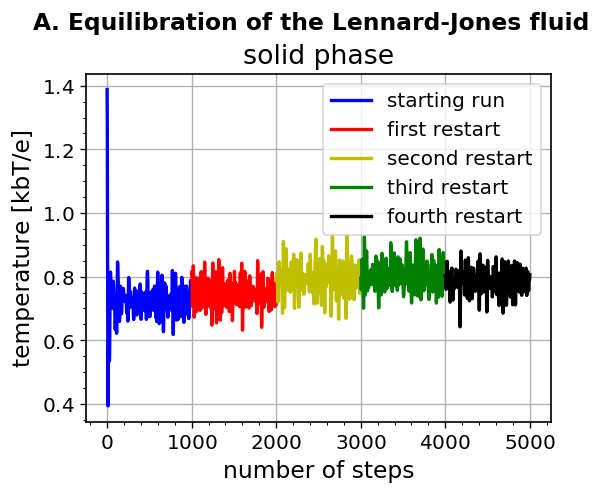

In [17]:
plt.figure(figsize=(5, 4), dpi=120)
plt.suptitle('A. Equilibration of the Lennard-Jones fluid', size=14)
mpl.rcParams['figure.subplot.top'] = 0.85

Nplots = [1, 2, 3, 4, 5]
nsteps = np.linspace(1, 1000, 1000)
colors = ['b','r','y','g','k']
labels = ['starting run', 'first restart', 'second restart', 'third restart', 'fourth restart']

for plot in Nplots:
    data = np.loadtxt('data/equilibration/eq{}.txt'.format(plot)).T
    plt.plot(nsteps+1000*(plot-1), 
             data, 
             color = colors[plot-1], 
             lw=2, 
             label=labels[plot-1])
    plt.xlabel("number of steps")
    plt.ylabel("temperature [kbT/e]")

plt.title("solid phase")
plt.legend(loc = 'upper right')
plt.show()

### B. Data-blocking evaluation of average quantities

Then, we improved again the MD code to make it perform data-blocking averages of the quantities of interest.

In the panel below the averages of some quantities of physical interest are shown (Note that the system had not been equilibrated).

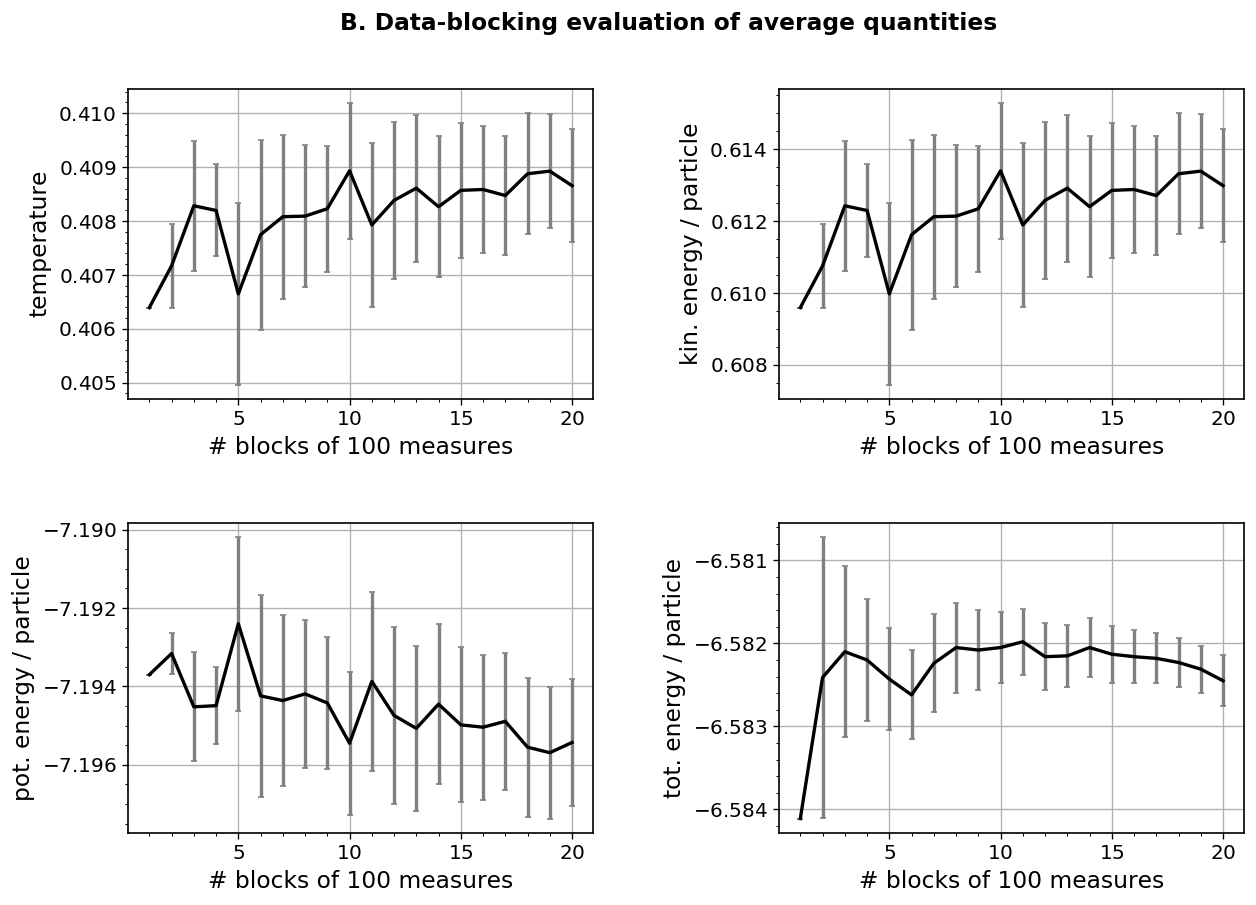

In [25]:
plt.figure(figsize=(12, 8), dpi=120)
plt.suptitle('B. Data-blocking evaluation of average quantities', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9

Nplots = [1, 2, 3, 4]
Data = ['data/averages/ave_temp.out', 'data/averages/ave_ekin.out', 
        'data/averages/ave_epot.out', 'data/averages/ave_etot.out']
labels = ['temperature', 'kin. energy / particle',
          'pot. energy / particle', 'tot. energy / particle']
for plot in Nplots:
    data = np.loadtxt(Data[plot-1]).T
    block_length = int(data[0][0])
    plt.subplot(2, 2, plot);
    plt.errorbar(data[0]/block_length, 
                 data[1], 
                 yerr=data[2], 
                 color='black',  
                 ecolor="gray")
    plt.xlabel('# blocks of {} measures'.format(block_length))
    plt.ylabel(labels[plot-1])
plt.show()    

### C.  Molecular dynamics simulations of Argon 

In the last part of the exercise we simulated the Argon:
($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) 

in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

In [30]:
## useful for quantities in SI units
sigma=0.34*10**(-9)
r=120
mass=39.948*1.66054*10**(-27)
K=1.3806*10**(-23)
eps=r*K

#### Equilibration of the system int he three different phases

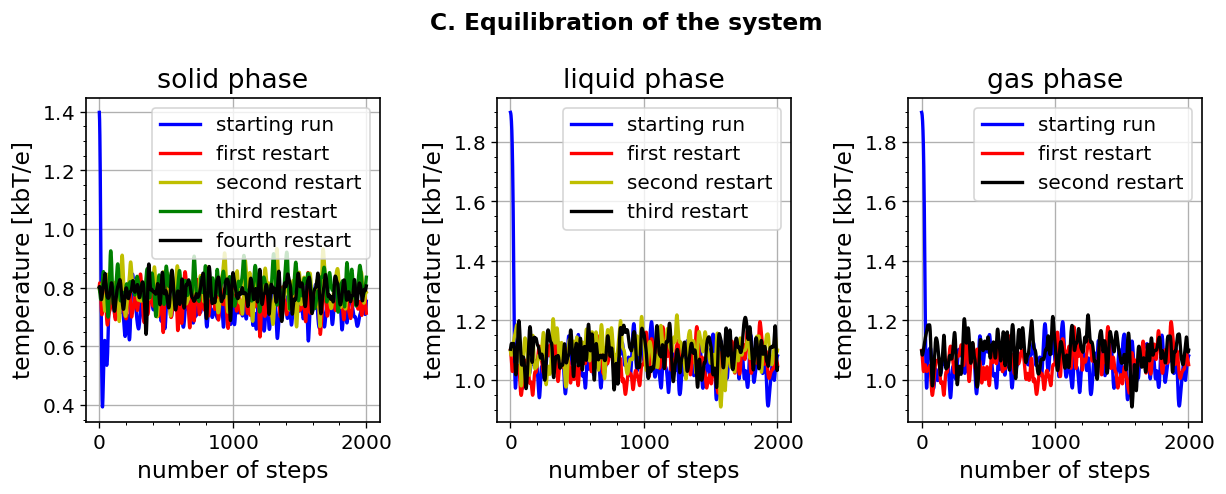

In [27]:
plt.figure(figsize=(12, 4), dpi=120)
plt.suptitle('C. Equilibration of the system', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

nsteps = np.linspace(1, 2001, 2000)
colors = ['b','r','y','g','k']
labels = ['starting run', 'first restart', 'second restart', 'third restart', 'fourth restart']

plt.subplot(1, 3, 1);
Nplots = [1, 2, 3, 4, 5]
for plot in Nplots:
    data = np.loadtxt("data/Argon/equilibration/solid_eq{}.txt".format(plot)).T
    plt.plot(nsteps, data, color = colors[plot-1], label=labels[plot-1])
    plt.xlabel("number of steps")
    plt.ylabel("temperature [kbT/e]")
    plt.title("solid phase")
    plt.legend()

colors = ['b','r','y','k']
plt.subplot(1, 3, 2);
Nplots = [1, 2, 3, 4]
for plot in Nplots:
    data = np.loadtxt("data/Argon/equilibration/liquid_eq{}.txt".format(plot)).T
    plt.plot(nsteps, data, color = colors[plot-1], label=labels[plot-1])
    plt.xlabel("number of steps")
    plt.ylabel("temperature [kbT/e]")
    plt.title("liquid phase")
    plt.legend()

plt.subplot(1, 3, 3);
colors = ['b','r','k']
Nplots = [1, 2, 3]
for plot in Nplots:
    data = np.loadtxt("data/Argon/equilibration/liquid_eq{}.txt".format(plot)).T
    plt.plot(nsteps, data, color = colors[plot-1], label=labels[plot-1])
    plt.xlabel("number of steps")
    plt.ylabel("temperature [kbT/e]")
    plt.title("gas phase")
    plt.legend()

plt.show()

#### Temperature

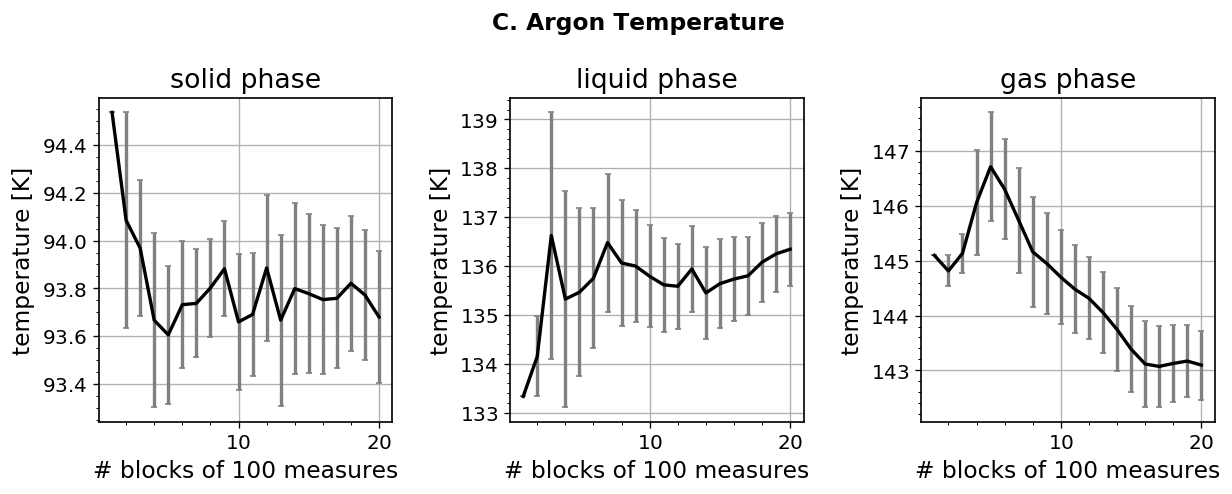

In [32]:
plt.figure(figsize=(12, 4), dpi=120)
plt.suptitle('C. Argon Temperature', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

Data = ['data/Argon/measures/solid_temp.txt',
        'data/Argon/measures/liquid_temp.txt',
        'data/Argon/measures/gas_temp.txt']
titles = ['solid phase', 'liquid phase', 'gas phase']
Nplots = [1, 2, 3]

for plot in Nplots:
    data = np.loadtxt(Data[plot-1]).T
    block_length = int(data[0][0])
    plt.subplot(1, 3, plot);
    plt.errorbar(data[0]/block_length, 
                 r*data[1], 
                 yerr=r*data[2], 
                 color = 'black', 
                 ecolor='gray')
    plt.xlabel('# blocks of {} measures'.format(block_length))
    plt.ylabel("temperature [K]")
    plt.title(titles[plot-1])
plt.show()

#### Average Kinetic Energy per particle

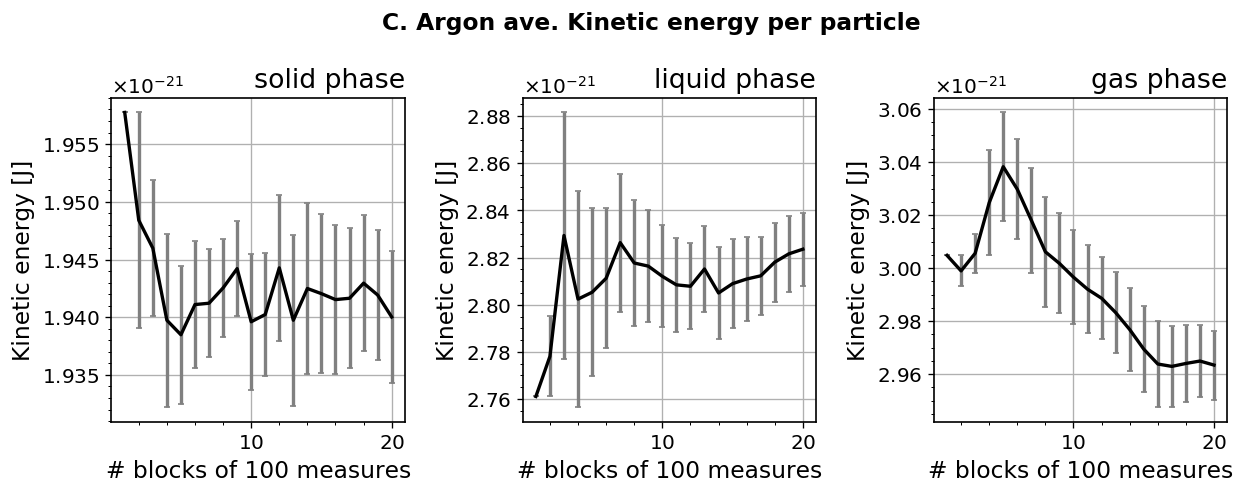

In [34]:
plt.figure(figsize=(12, 4), dpi=120)
plt.suptitle('C. Argon ave. Kinetic energy per particle', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

Data = ['data/Argon/measures/solid_ekin.txt',
        'data/Argon/measures/liquid_ekin.txt',
        'data/Argon/measures/gas_ekin.txt']
titles = ['solid phase', 'liquid phase', 'gas phase']
Nplots = [1, 2, 3]

for plot in Nplots:
    data = np.loadtxt(Data[plot-1]).T
    block_length = int(data[0][0])
    plt.subplot(1, 3, plot);
    plt.errorbar(data[0]/block_length, 
                 eps*data[1], 
                 yerr=eps*data[2], 
                 color = 'black', 
                 ecolor='gray')
    plt.xlabel('# blocks of {} measures'.format(block_length))
    plt.ylabel("Kinetic energy [J]")
    plt.title(titles[plot-1], loc='right')
plt.show()

#### Average Interaction Energy per particle

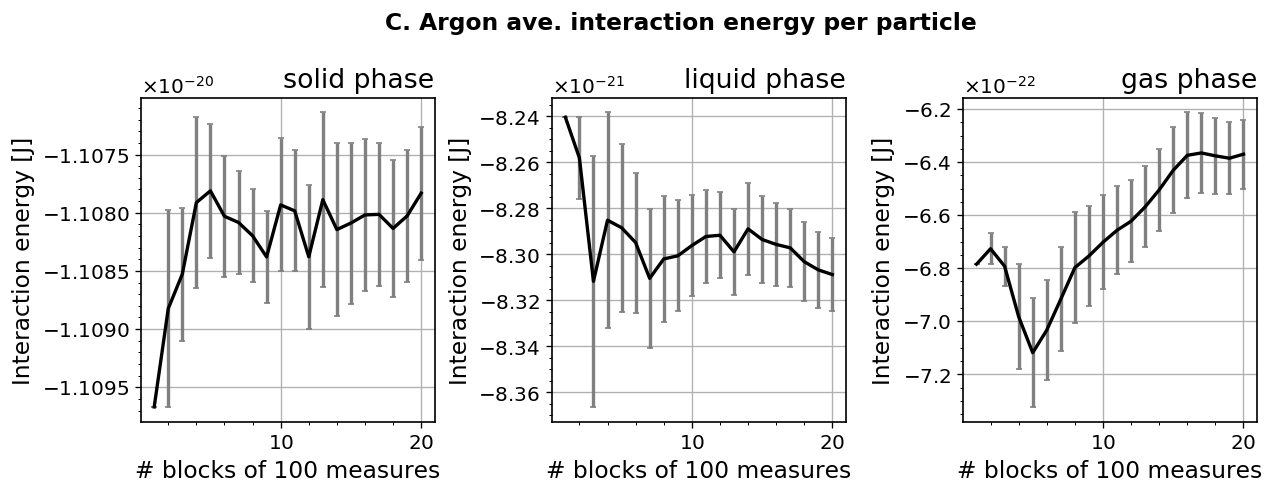

In [36]:
plt.figure(figsize=(12, 4), dpi=120)
plt.suptitle('C. Argon ave. interaction energy per particle', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

Data = ['data/Argon/measures/solid_epot.txt',
        'data/Argon/measures/liquid_epot.txt',
        'data/Argon/measures/gas_epot.txt']
titles = ['solid phase', 'liquid phase', 'gas phase']
Nplots = [1, 2, 3]

for plot in Nplots:
    data = np.loadtxt(Data[plot-1]).T
    block_length = int(data[0][0])
    plt.subplot(1, 3, plot);
    plt.errorbar(data[0]/block_length, 
                 eps*data[1], 
                 yerr=eps*data[2], 
                 color = 'black', 
                 ecolor='gray')
    plt.xlabel('# blocks of {} measures'.format(block_length))
    plt.ylabel("Interaction energy [J]")
    plt.title(titles[plot-1], loc='right')
plt.show()

#### Average Energy per particle

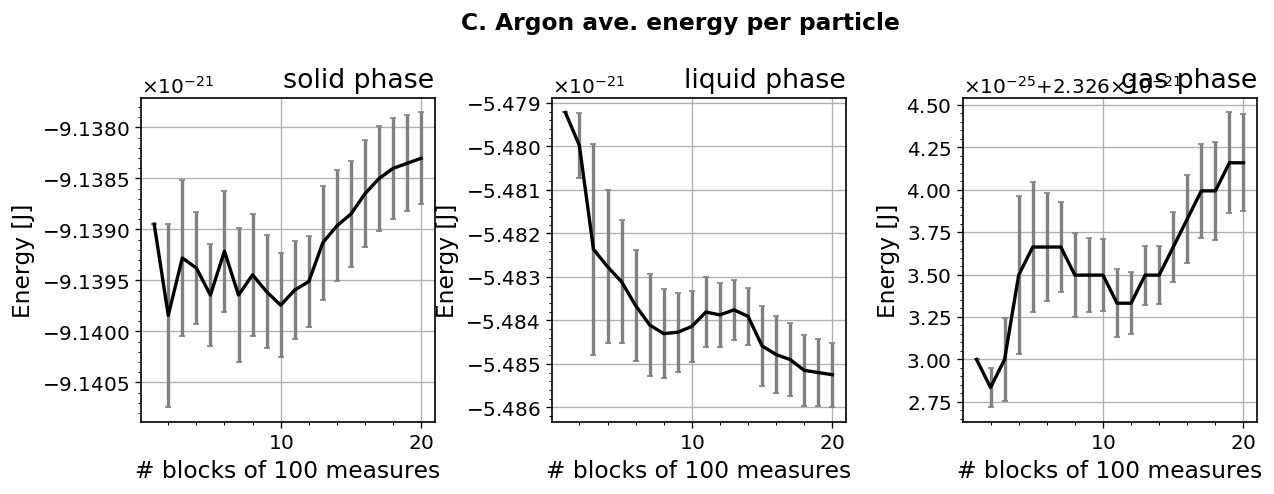

In [38]:
plt.figure(figsize=(12, 4), dpi=120)
plt.suptitle('C. Argon ave. energy per particle', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

Data = ['data/Argon/measures/solid_etot.txt',
        'data/Argon/measures/liquid_etot.txt',
        'data/Argon/measures/gas_etot.txt']
titles = ['solid phase', 'liquid phase', 'gas phase']
Nplots = [1, 2, 3]

for plot in Nplots:
    data = np.loadtxt(Data[plot-1]).T
    block_length = int(data[0][0])
    plt.subplot(1, 3, plot);
    plt.errorbar(data[0]/block_length, 
                 eps*data[1], 
                 yerr=eps*data[2], 
                 color = 'black', 
                 ecolor='gray')
    plt.xlabel('# blocks of {} measures'.format(block_length))
    plt.ylabel("Energy [J]")
    plt.title(titles[plot-1], loc='right')
plt.show()